=== SALES DATA ANALYSIS ===

1. Loading CSV file...
✅ CSV file loaded successfully!
Dataset shape: (100, 6)

2. Basic DataFrame Information:
Shape of DataFrame: (100, 6)

Columns: ['Date', 'Region', 'Product', 'Sales_Amount', 'Quantity', 'Customer_Type']

Data types:
Date             datetime64[ns]
Region                   object
Product                  object
Sales_Amount              int64
Quantity                  int64
Customer_Type            object
dtype: object

3. First 5 rows using .head():
        Date Region      Product  Sales_Amount  Quantity Customer_Type
0 2024-01-01  North  Accessories           385        13           New
1 2024-01-02  North       Tablet          2881        16     Corporate
2 2024-01-03  South        Phone          2723        19           New
3 2024-01-04  North       Tablet          1688         1     Returning
4 2024-01-05   West        Phone          3890        19           New

4. Checking for NaN values:
Date             0
Region           0
P

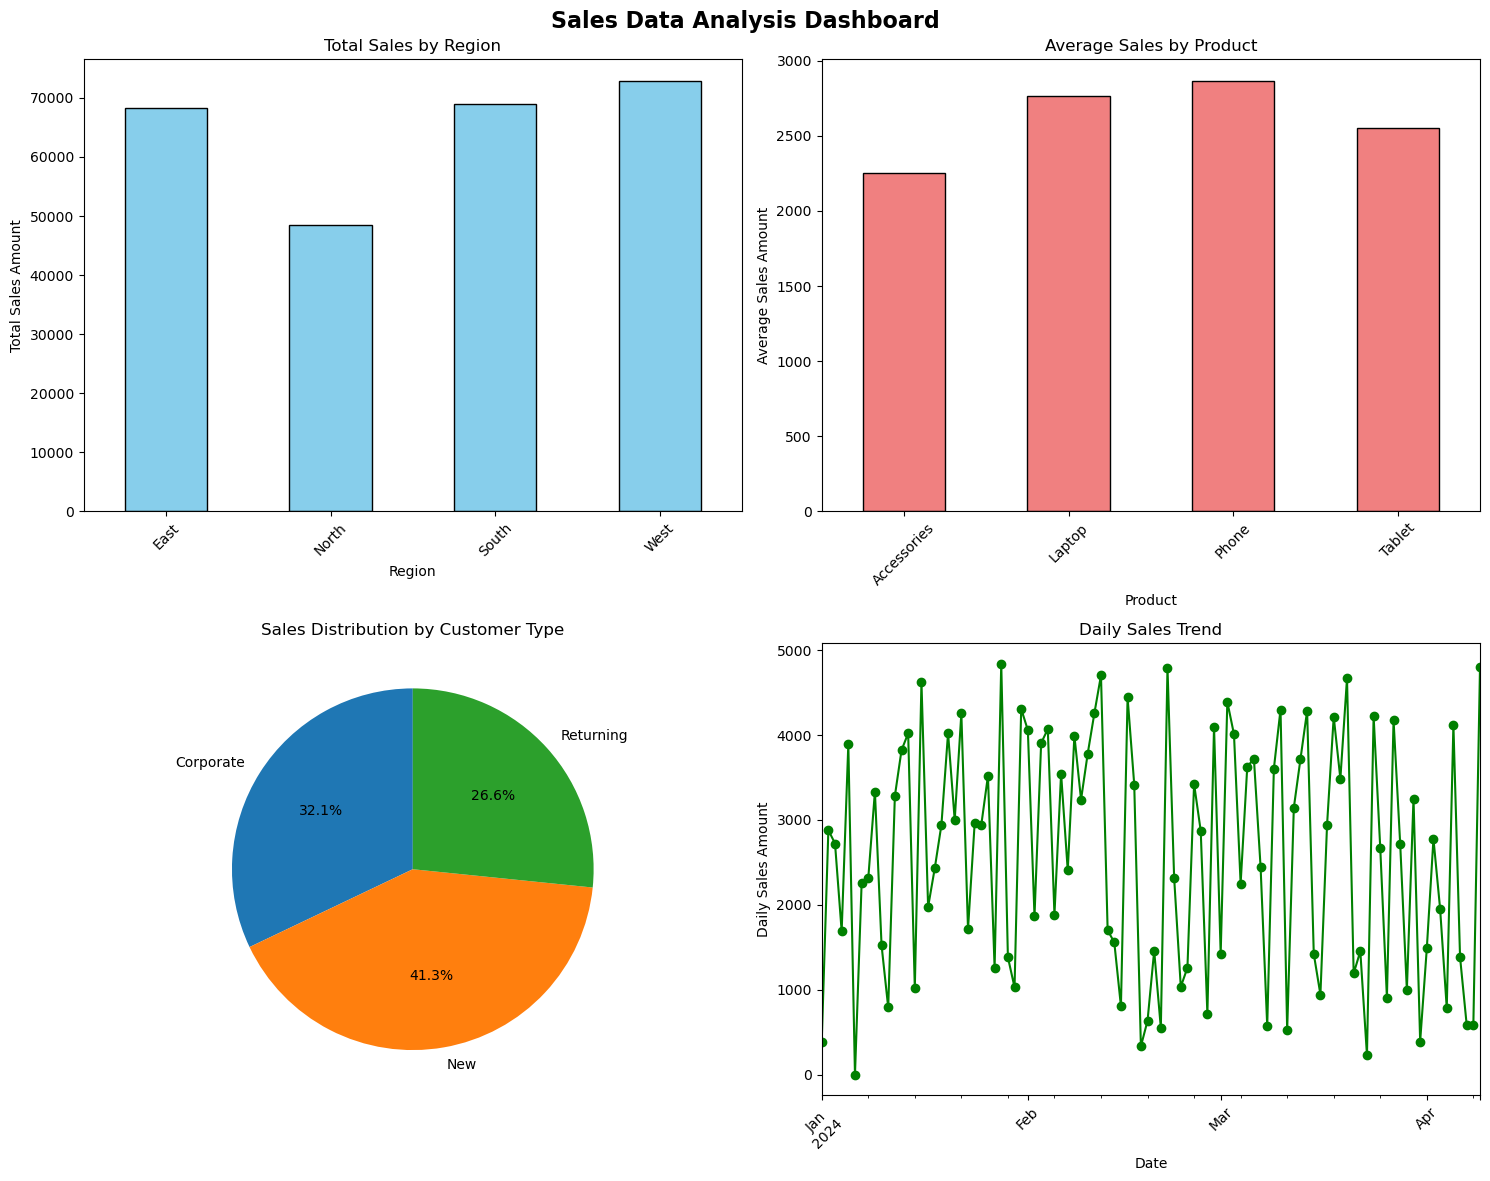


9. Additional Data Insights:
Total Sales: $258,661.00
Average Sale Amount: $2612.74
Total Quantity Sold: 1033 units
Number of unique products: 4
Date range: 2024-01-01 00:00:00 to 2024-04-09 00:00:00

10. Data Cleaning:
Before cleaning - Records with NaN: 1
After cleaning - Records with NaN: 0
Records removed: 1

🎉 Analysis completed successfully!
📊 Charts saved as 'sales_analysis_charts.png'
💾 Data saved as 'sales_data.csv'


In [1]:
# sales_analysis.py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set style for better plots
plt.style.use('default')

print("=== SALES DATA ANALYSIS ===\n")

# 1. Load CSV using Pandas
print("1. Loading CSV file...")
try:
    # Create sample sales data (in real scenario, you'd load from actual CSV)
    data = {
        'Date': pd.date_range('2024-01-01', periods=100, freq='D'),
        'Region': np.random.choice(['North', 'South', 'East', 'West'], 100),
        'Product': np.random.choice(['Laptop', 'Phone', 'Tablet', 'Accessories'], 100),
        'Sales_Amount': np.random.randint(100, 5000, 100),
        'Quantity': np.random.randint(1, 20, 100),
        'Customer_Type': np.random.choice(['New', 'Returning', 'Corporate'], 100)
    }
    
    df = pd.DataFrame(data)
    df.to_csv('sales_data.csv', index=False)
    
    # Now load the CSV file
    df = pd.read_csv('sales_data.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    
    print("✅ CSV file loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    
except Exception as e:
    print(f"❌ Error loading CSV: {e}")

# 2. Basic DataFrame operations
print("\n2. Basic DataFrame Information:")
print(f"Shape of DataFrame: {df.shape}")  # Rows, Columns
print(f"\nColumns: {list(df.columns)}")
print(f"\nData types:\n{df.dtypes}")

# 3. Using head() to preview data
print("\n3. First 5 rows using .head():")
print(df.head())

# 4. Handling NaN values
print("\n4. Checking for NaN values:")
print(df.isnull().sum())

# Add some NaN values for demonstration
df.loc[5, 'Sales_Amount'] = np.nan
print(f"\nAfter adding demo NaN: {df['Sales_Amount'].isnull().sum()} NaN values")

# 5. Using groupby() for analysis
print("\n5. GroupBy Operations:")

# Total sales by region
print("\n📊 Total Sales by Region:")
sales_by_region = df.groupby('Region')['Sales_Amount'].sum()
print(sales_by_region)

# Average sales by product
print("\n📊 Average Sales by Product:")
avg_sales_by_product = df.groupby('Product')['Sales_Amount'].mean()
print(avg_sales_by_product)

# Multiple aggregations
print("\n📊 Sales Summary by Region and Product:")
summary = df.groupby(['Region', 'Product']).agg({
    'Sales_Amount': ['sum', 'mean', 'count'],
    'Quantity': 'sum'
}).round(2)
print(summary)

# 6. Filtering rows
print("\n6. Filtering Operations:")

# Filter rows where Sales_Amount > 2000
high_sales = df[df['Sales_Amount'] > 2000]
print(f"High sales records (>2000): {len(high_sales)}")

# Filter using multiple conditions
north_laptop_sales = df[(df['Region'] == 'North') & (df['Product'] == 'Laptop')]
print(f"North region laptop sales: {len(north_laptop_sales)} records")

# 7. Using loc[] and iloc[]
print("\n7. loc[] vs iloc[] demonstration:")

# Using loc[] for label-based indexing
print("\nUsing loc[] (label-based):")
print(df.loc[0:2, ['Region', 'Product', 'Sales_Amount']])

# Using iloc[] for position-based indexing
print("\nUsing iloc[] (position-based):")
print(df.iloc[0:3, 1:4])

# 8. Data Visualization
print("\n8. Creating Visualizations:")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Sales Data Analysis Dashboard', fontsize=16, fontweight='bold')

# Bar chart 1: Total sales by region
sales_by_region.plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Total Sales by Region')
axes[0,0].set_ylabel('Total Sales Amount')
axes[0,0].tick_params(axis='x', rotation=45)

# Bar chart 2: Average sales by product
avg_sales_by_product.plot(kind='bar', ax=axes[0,1], color='lightcoral', edgecolor='black')
axes[0,1].set_title('Average Sales by Product')
axes[0,1].set_ylabel('Average Sales Amount')
axes[0,1].tick_params(axis='x', rotation=45)

# Pie chart: Sales distribution by customer type
customer_sales = df.groupby('Customer_Type')['Sales_Amount'].sum()
customer_sales.plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Sales Distribution by Customer Type')
axes[1,0].set_ylabel('')  # Remove y-label for pie chart

# Line chart: Sales trend (daily)
daily_sales = df.groupby('Date')['Sales_Amount'].sum()
daily_sales.plot(kind='line', ax=axes[1,1], color='green', marker='o')
axes[1,1].set_title('Daily Sales Trend')
axes[1,1].set_ylabel('Daily Sales Amount')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('sales_analysis_charts.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. Additional insights
print("\n9. Additional Data Insights:")
print(f"Total Sales: ${df['Sales_Amount'].sum():,.2f}")
print(f"Average Sale Amount: ${df['Sales_Amount'].mean():.2f}")
print(f"Total Quantity Sold: {df['Quantity'].sum()} units")
print(f"Number of unique products: {df['Product'].nunique()}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

# 10. Data cleaning example
print("\n10. Data Cleaning:")
print(f"Before cleaning - Records with NaN: {df.isnull().sum().sum()}")
df_cleaned = df.dropna()  # Remove rows with NaN values
print(f"After cleaning - Records with NaN: {df_cleaned.isnull().sum().sum()}")
print(f"Records removed: {len(df) - len(df_cleaned)}")

print("\n🎉 Analysis completed successfully!")
print("📊 Charts saved as 'sales_analysis_charts.png'")
print("💾 Data saved as 'sales_data.csv'")